<a href="https://colab.research.google.com/github/GiuliaFContardi/FL_IDS-GAN/blob/main/MLP_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import

In [ ]:
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# data is stored in google drive folder so import drive to notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##GEN DATASET (valutazione GAN)

#### Classi maggiori

In [ ]:
#Aggiungere labels e solo dopo unire tutti i gen
dfBenign = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBuono/genBenign.csv')
dfPortscan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBuono/genPortscan.csv')
dfDoS = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBuono/genDoS.csv')
dfDDoS = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBuono/genDDoS.csv')

#### CSV classi minori con valori minimi

In [ ]:
dfBruteforce = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBuono/Bruteforce/genBruteforce_pochiNuovi.csv')
dfBotnet = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBuono/Botnet/genBotnet_pochiNuovi.csv')

#### CSV con 10000 samples x classi minori

In [ ]:
dfBruteforce = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBuono/Bruteforce/genBruteforce_10000.csv')
dfBotnet = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBuono/Botnet/genBotnet_10000.csv')

#### Resto...TUTTE CLASSI

In [ ]:
#rows_to_drop = range(2000)
#df_dropped_Botnet = dfBotnet.drop(rows_to_drop)

# Display the DataFrame after dropping rows
#print(df_dropped_Botnet.shape)

#dfBotnet=df_dropped_Botnet

In [ ]:
dfBenign['L_BENIGN'] = 1
dfPortscan['L_Infiltration_Portscan'] = 1
dfDoS['L_DoS'] = 1
dfDDoS['L_DDoS'] = 1
dfBruteforce['L_BruteForce'] = 1
dfBotnet['L_Botnet'] = 1

dfBenign['L_Infiltration_Portscan'] = 0
dfBenign['L_DoS'] = 0
dfBenign['L_DDoS'] = 0
dfBenign['L_BruteForce'] = 0
dfBenign['L_Botnet'] = 0

dfPortscan['L_BENIGN'] = 0
dfPortscan['L_DoS'] = 0
dfPortscan['L_DDoS'] = 0
dfPortscan['L_BruteForce'] = 0
dfPortscan['L_Botnet'] = 0

dfDoS['L_BENIGN'] = 0
dfDoS['L_Infiltration_Portscan'] = 0
dfDoS['L_DDoS'] = 0
dfDoS['L_BruteForce'] = 0
dfDoS['L_Botnet'] = 0

dfDDoS['L_BENIGN'] = 0
dfDDoS['L_Infiltration_Portscan'] = 0
dfDDoS['L_DoS'] = 0
dfDDoS['L_BruteForce'] = 0
dfDDoS['L_Botnet'] = 0

dfBruteforce['L_BENIGN'] = 0
dfBruteforce['L_Infiltration_Portscan'] = 0
dfBruteforce['L_DoS'] = 0
dfBruteforce['L_DDoS'] = 0
dfBruteforce['L_Botnet'] = 0

dfBotnet['L_BENIGN'] = 0
dfBotnet['L_Infiltration_Portscan'] = 0
dfBotnet['L_DoS'] = 0
dfBotnet['L_DDoS'] = 0
dfBotnet['L_BruteForce'] = 0

In [ ]:
merged_df = pd.concat([dfBenign, dfPortscan, dfDoS, dfDDoS, dfBruteforce, dfBotnet], axis=0, ignore_index=True)

In [ ]:
merged_df.shape

(1484419, 41)

In [ ]:
col_labels = ['L_BENIGN', 'L_Infiltration_Portscan', 'L_DoS', 'L_DDoS', 'L_BruteForce', 'L_Botnet']
y_train = merged_df[['L_BENIGN','L_Infiltration_Portscan','L_DDoS','L_DoS','L_BruteForce','L_Botnet']]
X_train = merged_df.drop(columns=col_labels)

In [ ]:
print("Samples per classe GEN")
print((merged_df['L_BENIGN']==1).values.sum())
print((merged_df['L_Infiltration_Portscan']==1).values.sum())
print((merged_df['L_DoS']==1).values.sum())
print((merged_df['L_DDoS']==1).values.sum())
print((merged_df['L_BruteForce']==1).values.sum())
print((merged_df['L_Botnet']==1).values.sum())

Samples per classe GEN
1116095
161597
120134
66593
10000
10000


In [ ]:
X_train.shape

(1484419, 35)

In [ ]:
merged_df_final = merged_df
from sklearn.utils import shuffle
merged_df_final = shuffle(merged_df_final).reset_index()
merged_df_final = merged_df_final.drop("index", axis=1) #elimino colonna indice creata dal reset_index

In [ ]:
merged_df_final.shape

(1484419, 41)

#### Resto...SOLO CLASSI MINORI

In [ ]:
dfBruteforce['L_BruteForce'] = 1
dfBotnet['L_Botnet'] = 1

dfBruteforce['L_BENIGN'] = 0
dfBruteforce['L_Infiltration_Portscan'] = 0
dfBruteforce['L_DoS'] = 0
dfBruteforce['L_DDoS'] = 0
dfBruteforce['L_Botnet'] = 0

dfBotnet['L_BENIGN'] = 0
dfBotnet['L_Infiltration_Portscan'] = 0
dfBotnet['L_DoS'] = 0
dfBotnet['L_DDoS'] = 0
dfBotnet['L_BruteForce'] = 0

In [ ]:
merged_df = pd.concat([dfBruteforce, dfBotnet], axis=0, ignore_index=True)
merged_df.shape

(20000, 41)

In [ ]:
col_labels = ['L_BENIGN', 'L_Infiltration_Portscan', 'L_DoS', 'L_DDoS', 'L_BruteForce', 'L_Botnet']
y_train = merged_df[['L_BENIGN','L_Infiltration_Portscan','L_DDoS','L_DoS','L_BruteForce','L_Botnet']]
X_train = merged_df.drop(columns=col_labels)
X_train.shape

(20000, 35)

In [ ]:
print("Samples per classe GEN")
print((merged_df['L_BENIGN']==1).values.sum())
print((merged_df['L_Infiltration_Portscan']==1).values.sum())
print((merged_df['L_DoS']==1).values.sum())
print((merged_df['L_DDoS']==1).values.sum())
print((merged_df['L_BruteForce']==1).values.sum())
print((merged_df['L_Botnet']==1).values.sum())

Samples per classe GEN
0
0
0
0
10000
10000


In [ ]:
merged_df_final = merged_df
from sklearn.utils import shuffle
merged_df_final = shuffle(merged_df_final).reset_index()
merged_df_final = merged_df_final.drop("index", axis=1) #elimino colonna indice creata dal reset_index

##REAL+GEN DATASET - DATA AUGMENTATION

In [ ]:
X_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/X_train_35.csv')
y_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/y_train_35.csv')

print(X_train.shape)
print(y_train.shape)

(1469838, 35)
(1469838, 6)


In [ ]:
dfReal = pd.concat([X_train, y_train], axis=1)

In [ ]:
dfReal.shape

(1469838, 41)

In [ ]:
print(dfReal.shape)
print(merged_df_final.shape)

(1469838, 41)
(1484419, 41)


In [ ]:
merged_df_complete = pd.concat([dfReal, merged_df_final], axis=0, ignore_index=True)
print(merged_df_complete.shape)

(2954257, 41)


In [ ]:
merged_df_complete = shuffle(merged_df_complete).reset_index()
merged_df_complete = merged_df_complete.drop("index", axis=1) #elimino colonna indice creata dal reset_index

In [ ]:
col_labels = ['L_BENIGN', 'L_Infiltration_Portscan', 'L_DoS', 'L_DDoS', 'L_BruteForce', 'L_Botnet']
y_train = merged_df_complete[['L_BENIGN','L_Infiltration_Portscan','L_DDoS','L_DoS','L_BruteForce','L_Botnet']]
X_train = merged_df_complete.drop(columns=col_labels)

In [ ]:
print("Samples per classe X_TRAIN")
print((dfReal['L_BENIGN']==1).values.sum())
print((dfReal['L_Infiltration_Portscan']==1).values.sum())
print((dfReal['L_DoS']==1).values.sum())
print((dfReal['L_DDoS']==1).values.sum())
print((dfReal['L_BruteForce']==1).values.sum())
print((dfReal['L_Botnet']==1).values.sum())
print("====================================")
print("Samples per classe GEN")
print((merged_df_final['L_BENIGN']==1).values.sum())
print((merged_df_final['L_Infiltration_Portscan']==1).values.sum())
print((merged_df_final['L_DoS']==1).values.sum())
print((merged_df_final['L_DDoS']==1).values.sum())
print((merged_df_final['L_BruteForce']==1).values.sum())
print((merged_df_final['L_Botnet']==1).values.sum())
print("====================================")
print("Samples per classe X_TRAIN+GEN")
print((merged_df_complete['L_BENIGN']==1).values.sum())
print((merged_df_complete['L_Infiltration_Portscan']==1).values.sum())
print((merged_df_complete['L_DoS']==1).values.sum())
print((merged_df_complete['L_DDoS']==1).values.sum())
print((merged_df_complete['L_BruteForce']==1).values.sum())
print((merged_df_complete['L_Botnet']==1).values.sum())

Samples per classe X_TRAIN
1116095
161597
120134
66593
4904
515
Samples per classe GEN
1116095
161597
120134
66593
10000
10000
Samples per classe X_TRAIN+GEN
2232190
323194
240268
133186
14904
10515


In [ ]:
X_train.shape

(2954257, 35)

In [ ]:
y_train.shape

(2954257, 6)

## REAL DATASET

In [ ]:
X_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/X_train_35.csv')
y_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/y_train_35.csv')

print(X_train.shape)
print(y_train.shape)

(1469838, 35)
(1469838, 6)


In [ ]:
#result = pd.concat([X_train, y_train], axis=1)
#result.shape
#result['L_BENIGN'].value_counts()

```
(1469838, 41)

BENIGN                   1116095
Infiltration_Portscan     161597
DoS                       120134
DDoS                       66593
BruteForce                  4904
Botnet                       515
```

## TEST DATASET

In [ ]:
X_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/X_test_35.csv')
y_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/y_test_35.csv')

print(X_test.shape)
print(y_test.shape)

(629931, 35)
(629931, 6)


In [ ]:
df_test = pd.concat([X_test, y_test], axis=1)

```
(629931, 41)

BENIGN                    478327
Infiltration_Portscan      69256
DoS                        51486
DDoS                       28540
BruteForce                  2101
Botnet                       221
```

## preparo array

In [ ]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1469838, 35), (1469838, 6), (629931, 35), (629931, 6))

# **Architettura IDS**

### Vecchi

#### Vecchia versione architettura modello

In [ ]:
l_r = 0.0005 #@param

In [ ]:
# build the classifier model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#def baseline_model():
  # create model
model = Sequential()
model.add(Dense(64, input_dim=35, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=l_r), metrics=['accuracy'])

#### Nuova versione architettura modello per riferimento valutazione
Fonte: https://ijece.iaescore.com/index.php/IJECE/article/view/26968/16288


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Define the model
model = Sequential()
model.add(InputLayer(input_shape=(35,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(72, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=l_r),
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Recall()])

#### Nuova versione (2) architettura modello per riferimento valutazione
Fonte: 10.1109/MILCOM47813.2019.9020824

### ***GIUSTA*** - Nuova versione (3) architettura modello per riferimento valutazione
Fonte: 10.3390/app13127328


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Dense(64, input_dim=35, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01))) #il paper si confonde e dà due valori: 0.001 e 0.01
model.add(Dense(6, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

### Model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2304      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
Total params: 35782 (139.77 KB)
Trainable params: 35782 (139.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Training**


In [ ]:
e = 300 #@param
v_split = 0.20 #@param
pat_earlyStop = 20 #@param
train_batch_size = 1024 #@param
lr = 0.001

Definisco un validation set migliore, più bilanciato...

In [ ]:
from sklearn.model_selection import train_test_split

X_combined = X_train
y_combined = y_train

X_train, X_val, y_train, y_val = train_test_split(
    X_combined, y_combined, test_size=v_split, random_state=3, stratify=y_combined
)

In [ ]:
print(X_train.shape)
print(X_val.shape)

(1175870, 35)
(293968, 35)


#### Class Weighting

In [ ]:
#Cerco di capire se l'imbalanced classes mi da problemi di TROPPA BRAVURA del DNN ==> eseguo class Weighting
from sklearn.utils.class_weight import compute_class_weight

class_values = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(class_values), y=class_values)
class_weight_dict = dict(zip(np.unique(class_values), class_weights))

In [ ]:
print(class_values)
print(class_weights)

[1 0 1 ... 0 1 0]
[2.19491098e-01 1.51594497e+00 3.67868629e+00 2.03916815e+00
 4.99562410e+01 4.75675566e+02]


#### Train

In [ ]:
from keras.callbacks import EarlyStopping

# Use EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=pat_earlyStop, restore_best_weights=True)

history = model.fit(X_train, y_train,  batch_size=train_batch_size, epochs=e, verbose=2, validation_data=(X_val, y_val), callbacks=[early_stopping], class_weight=class_weight_dict)
#
#

Epoch 1/300
1149/1149 - 8s - loss: 0.9886 - accuracy: 0.7896 - val_loss: 0.7051 - val_accuracy: 0.8895 - 8s/epoch - 7ms/step
Epoch 2/300
1149/1149 - 7s - loss: 0.5018 - accuracy: 0.8856 - val_loss: 0.6495 - val_accuracy: 0.8831 - 7s/epoch - 6ms/step
Epoch 3/300
1149/1149 - 7s - loss: 0.4243 - accuracy: 0.8923 - val_loss: 0.5285 - val_accuracy: 0.9008 - 7s/epoch - 6ms/step
Epoch 4/300
1149/1149 - 7s - loss: 0.3908 - accuracy: 0.8977 - val_loss: 0.5201 - val_accuracy: 0.9008 - 7s/epoch - 6ms/step
Epoch 5/300
1149/1149 - 7s - loss: 0.3885 - accuracy: 0.8935 - val_loss: 0.4825 - val_accuracy: 0.9150 - 7s/epoch - 6ms/step
Epoch 6/300
1149/1149 - 7s - loss: 0.3409 - accuracy: 0.9101 - val_loss: 0.4992 - val_accuracy: 0.9076 - 7s/epoch - 6ms/step
Epoch 7/300
1149/1149 - 7s - loss: 0.3342 - accuracy: 0.9119 - val_loss: 0.4929 - val_accuracy: 0.9089 - 7s/epoch - 6ms/step
Epoch 8/300
1149/1149 - 7s - loss: 0.3151 - accuracy: 0.9155 - val_loss: 0.4756 - val_accuracy: 0.9127 - 7s/epoch - 6ms/step


# **Valutazione**

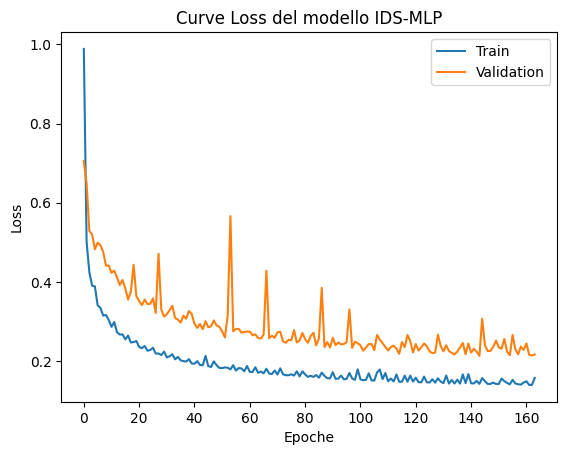

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curve Loss del modello IDS-MLP')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

#salva in Drive
images_dir = '/content/drive/MyDrive/Colab Notebooks/progettoTesi/grafici_pdf/ids-easy/finali'
plt.savefig(f"{images_dir}/IDS-MLP_GraficoLosses_REAL_Train-Valid_CW.pdf", dpi=200, format='pdf')


plt.show()

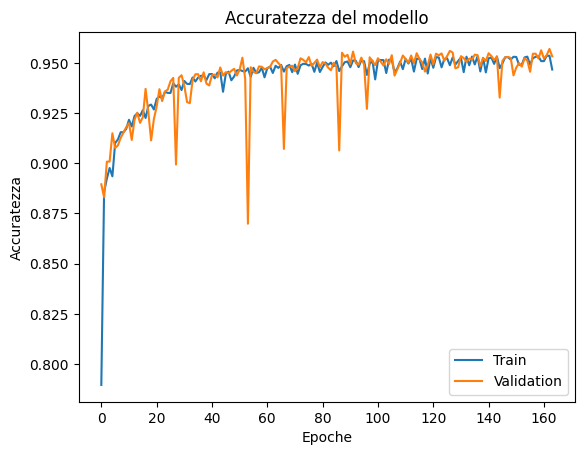

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuratezza del modello')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.legend(['Train', 'Validation'], loc='lower right')

#salva in Drive
plt.savefig(f"{images_dir}/IDS-MLP_GraficoAccuratezza_REAL_Train-Valid_CW.pdf", dpi=200, format='pdf')

plt.show()

In [ ]:
eval_result  = model.evaluate(X_test, y_test, verbose=2, batch_size=512) #The model evaluates the test dataset in batches to save memory and computational resources.

# Get loss and accuracy from the evaluation result
loss = eval_result[0]
accuracy = eval_result[1]

print("======================================")
print(f"Test Loss: {eval_result[0]}")
print(f"Test Accuracy: {eval_result[1]}")

1231/1231 - 3s - loss: 0.2103 - accuracy: 0.9539 - 3s/epoch - 2ms/step
Test Loss: 0.21033774316310883
Test Accuracy: 0.9538949728012085


In [ ]:
# predictions // number of times the model classified an input as each class

# import numpy for argmax function // returns the max value on an axis... index with max value is predicted class
import numpy as np

y_prediction = model.predict(X_test)
y_pred_classes= np.argmax(y_prediction, axis=1)

19686/19686 [==============================] - 28s 1ms/step


In [ ]:
df_y_pred_classes = pd.DataFrame(y_pred_classes)
df_y_pred_classes.value_counts()

0    451594
1     76970
3     56805
2     29732
4     12866
5      1964
dtype: int64

In [ ]:
y_test_rounded = np.argmax(y_test, axis=1)

The balanced accuracy score is designed to address the issue of class imbalance. It calculates the average accuracy for each class and then computes the mean of these per-class accuracies

In [ ]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test_rounded, y_pred_classes)
print('Balanced Accuracy:', balanced_accuracy)
accuracy = accuracy_score(y_test_rounded, y_pred_classes)
print('Accuracy:', accuracy)

Balanced Accuracy: 0.9849905019245032
Accuracy: 0.9538949503993295


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_rounded, y_pred_classes, average='weighted', zero_division=1)
print('Precision: %f' % precision)
m_precision = precision_score(y_test_rounded, y_pred_classes, average='macro', zero_division=1)
print('Macro Precision: %f' % m_precision)
print("======================")
recall = recall_score(y_test_rounded, y_pred_classes, average='weighted', zero_division=1)
print('Recall: %f' % recall)
m_recall = recall_score(y_test_rounded, y_pred_classes, average='macro', zero_division=1)
print('Macro Recall: %f' % m_recall)
print("=======================")
f1 = f1_score(y_test_rounded, y_pred_classes, average='weighted', zero_division=1)
print('F1 score: %f' % f1)
m_f1 = f1_score(y_test_rounded, y_pred_classes, average='macro', zero_division=1)
print('Macro F1 score: %f' % m_f1)

Precision: 0.972948
Macro Precision: 0.668752
Recall: 0.953895
Macro Recall: 0.984991
F1 score: 0.961196
Macro F1 score: 0.716831


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test_rounded, y_pred_classes, average=None, zero_division=1)
print('Precision per class:', precision)
print('Recall per class:', recall)
print('F1 score per class:', f1)

Precision per class: [0.99864259 0.89327011 0.95960581 0.88555585 0.16291    0.11252546]
Recall per class: [0.94282991 0.99276597 0.99968465 0.9770423  0.99762018 1.        ]
F1 score per class: [0.96993401 0.94039364 0.97923531 0.92905228 0.28008285 0.20228833]


In [ ]:
from sklearn.metrics import classification_report
repo = classification_report(y_test_rounded, y_pred_classes, zero_division=1) #zero_division=1 perchè non ha imparato alcune classi
print(repo)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    478327
           1       0.89      0.99      0.94     69256
           2       0.96      1.00      0.98     28540
           3       0.89      0.98      0.93     51486
           4       0.16      1.00      0.28      2101
           5       0.11      1.00      0.20       221

    accuracy                           0.95    629931
   macro avg       0.67      0.98      0.72    629931
weighted avg       0.97      0.95      0.96    629931



In [ ]:
# import plotting function and confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

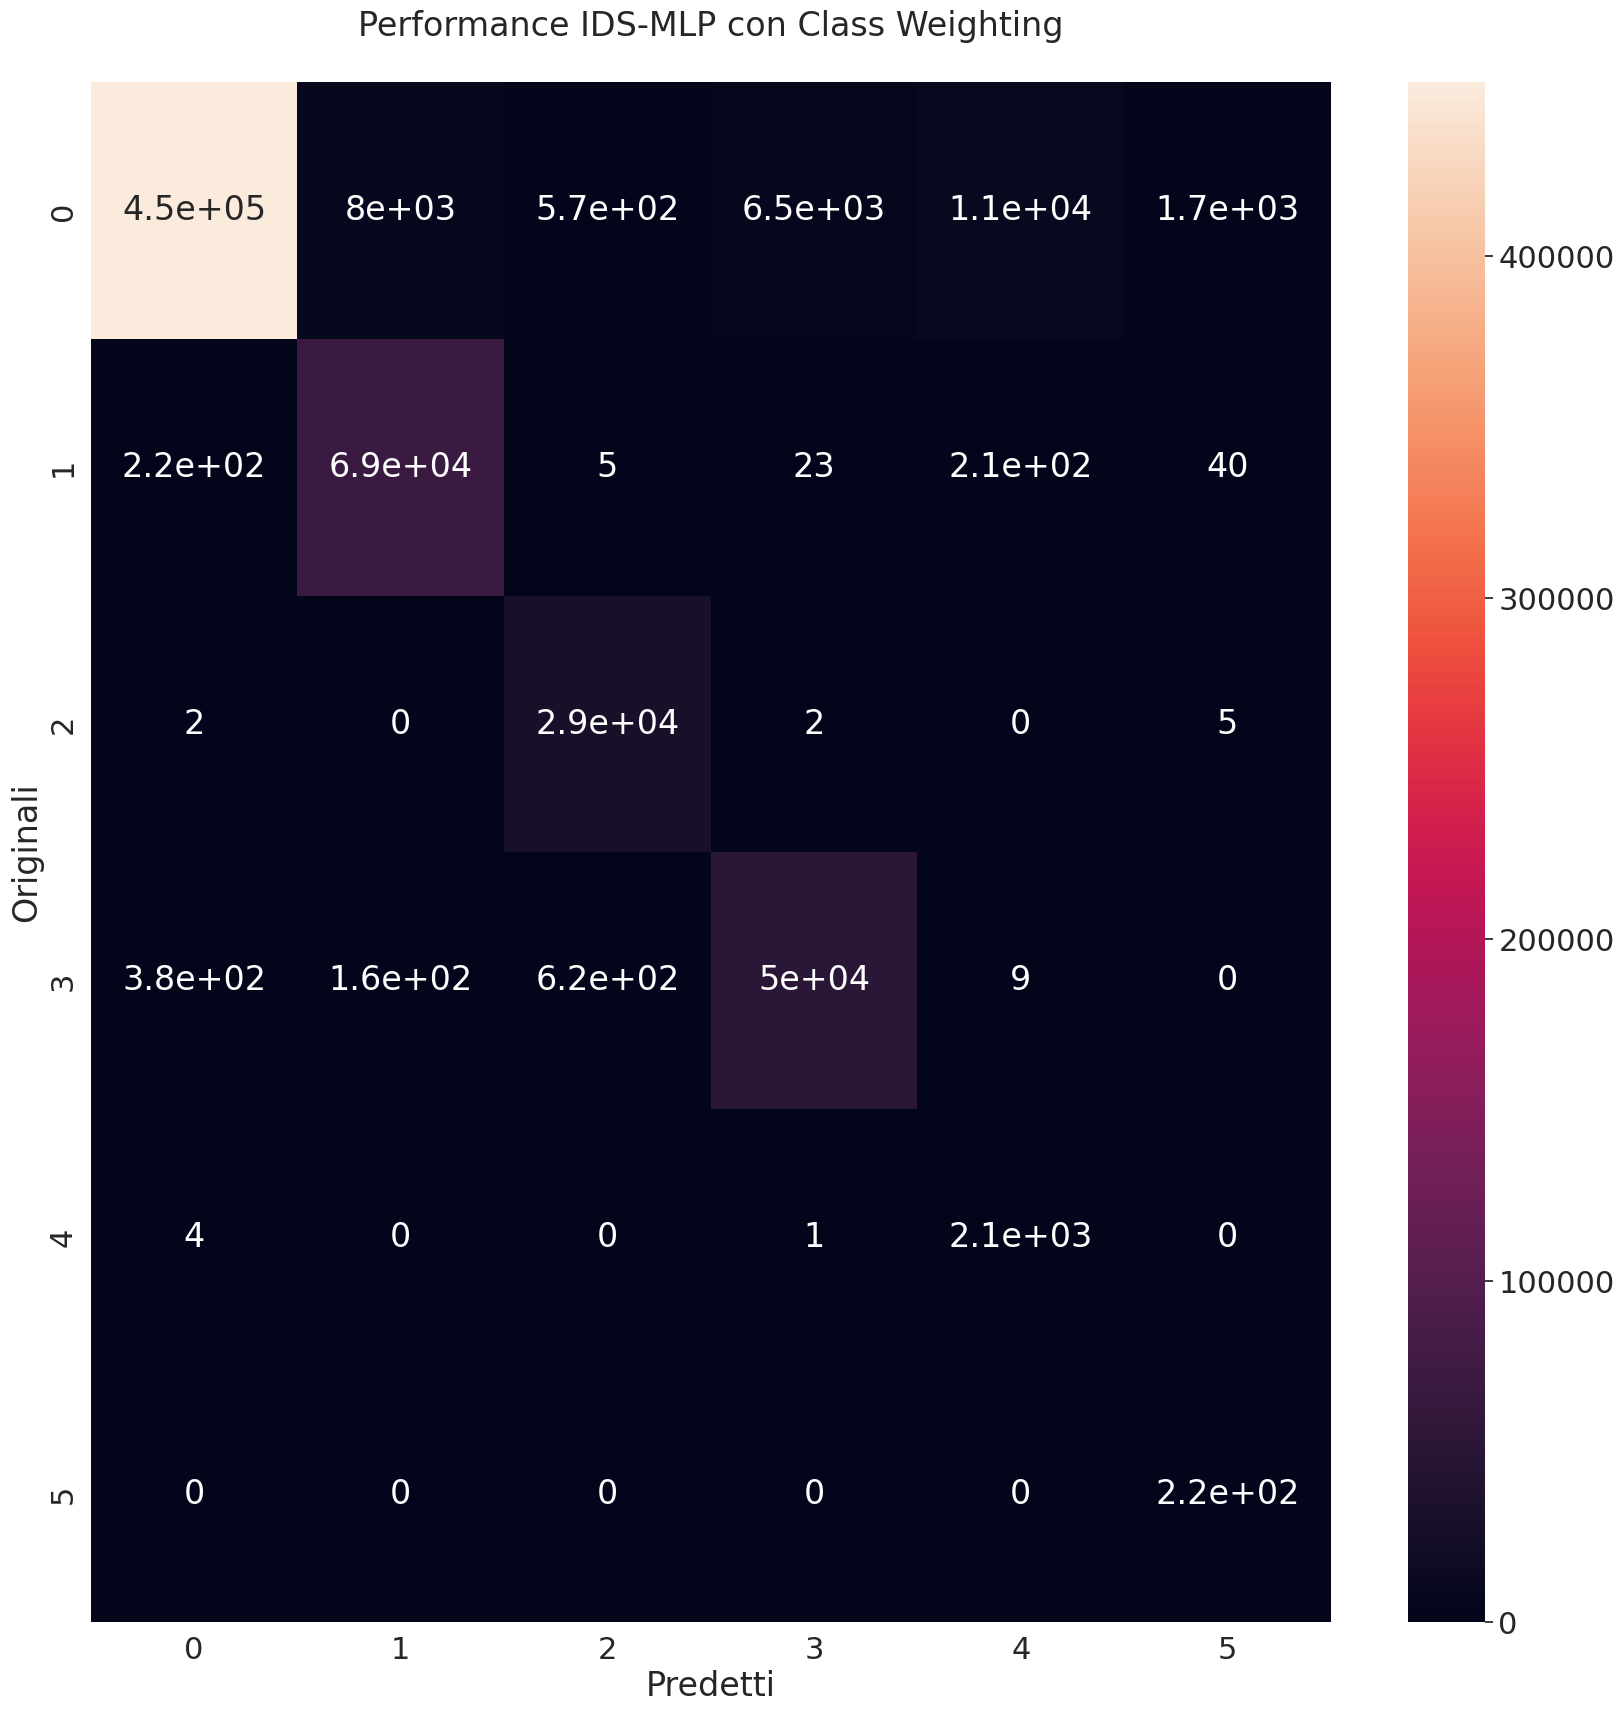

In [ ]:
labels = [0, 1, 2, 3, 4, 5]

confusion_mat = confusion_matrix(y_test_rounded, y_pred_classes, labels=labels)

sn.set(font_scale=2)

plt.figure(figsize = (20,20))
s = sn.heatmap(confusion_mat, annot = True)#, cmap = 'Blues',fmt='.2f'

s.set_xlabel('Predetti')
s.set_ylabel('Originali')

plt.title("Performance IDS-MLP con Class Weighting\n")

#salva in Drive
plt.savefig(f"{images_dir}/IDS-MLP_ConfusionMatrix_REAL_CW.pdf", dpi=200, format='pdf') #ClassWeighting

plt.show()

In [ ]:
labels = [0, 1, 2, 3, 4, 5]

confusion_mat = confusion_matrix(y_test_rounded, y_pred_classes, labels=labels)

# Calculate additional metrics
for i in range(len(labels)):
    tn = sum(confusion_mat[j, k] for j in range(len(labels)) if j != i for k in range(len(labels)) if k != i)
    fp = sum(confusion_mat[j, i] for j in range(len(labels)) if j != i)
    fn = sum(confusion_mat[i, k] for k in range(len(labels)) if k != i)
    tp = confusion_mat[i, i]

    # Display TP, TN, FP, FN
    print(f"Class {labels[i]} TP:", tp)
    print(f"Class {labels[i]} TN:", tn)
    print(f"Class {labels[i]} FP:", fp)
    print(f"Class {labels[i]} FN:", fn)
    print("============================================")

Class 0 TP: 450981
Class 0 TN: 150991
Class 0 FP: 613
Class 0 FN: 27346
Class 1 TP: 68755
Class 1 TN: 552460
Class 1 FP: 8215
Class 1 FN: 501
Class 2 TP: 28531
Class 2 TN: 600190
Class 2 FP: 1201
Class 2 FN: 9
Class 3 TP: 50304
Class 3 TN: 571944
Class 3 FP: 6501
Class 3 FN: 1182
Class 4 TP: 2096
Class 4 TN: 617060
Class 4 FP: 10770
Class 4 FN: 5
Class 5 TP: 221
Class 5 TN: 627967
Class 5 FP: 1743
Class 5 FN: 0


In [ ]:
labels = [0, 1, 2, 3, 4, 5]

confusion_mat = confusion_matrix(y_test_rounded, y_pred_classes, labels=labels)

# Calculate additional metrics
for i in range(len(labels)):
    tn = sum(confusion_mat[j, k] for j in range(len(labels)) if j != i for k in range(len(labels)) if k != i)
    fp = sum(confusion_mat[j, i] for j in range(len(labels)) if j != i)
    fn = sum(confusion_mat[i, k] for k in range(len(labels)) if k != i)
    tp = confusion_mat[i, i]

    # Calculate additional metrics
    specificity = tn / (tn + fp)
    false_positive_rate = fp / (fp + tn)

    # Display additional metrics
    print(f"Class {labels[i]} Specificity:", specificity)
    print(f"Class {labels[i]} False Positive Rate:", false_positive_rate)


Class 0 Specificity: 0.9959565710667265
Class 0 False Positive Rate: 0.004043428933273529
Class 1 Specificity: 0.985348018014001
Class 1 False Positive Rate: 0.014651981985999018
Class 2 Specificity: 0.9980029631304759
Class 2 False Positive Rate: 0.001997036869524153
Class 3 Specificity: 0.9887612478282292
Class 3 False Positive Rate: 0.011238752171770868
Class 4 Specificity: 0.9828456747845754
Class 4 False Positive Rate: 0.017154325215424558
Class 5 Specificity: 0.9972320592018549
Class 5 False Positive Rate: 0.002767940798145178


* A ***high specificity*** indicates that the model is effective at avoiding false positives for a particular class.
* A ***low false positive rate*** means the model is good at minimizing the number of instances from other classes mistakenly classified as positive for a particular class.

Pay attention to specificity and false positive rate, especially for minority classes. In imbalanced datasets, these metrics help assess how well the model is handling the recognition of less frequent classes

# Osservazioni con GAN

**ONLY GEN DATA FOR TRAINING**
> It's important to note that while this approach can provide insights into the quality of the GAN-generated data, using a combination of real and generated data is often recommended for robust model training.

## Altre osservazioni

The generated samples might be visually similar but lack the diversity and relevance needed to enhance the model's ability to generalize to different attack patterns.
it may indicate that the GAN needs further refinement to better capture the complexities of the real dataset.

> Remember that the effectiveness of the GAN depends on how well it captures the complexity and diversity of the real dataset. If the GAN fails to generate samples that align with the real data distribution, the synthetic data may not contribute positively to the performance of the IDS model.

If the intrusion detection metrics on the generated dataset are similar to those on the real dataset, it suggests that the GAN is generating synthetic data that captures the characteristics of the real data, at least in terms of intrusion detection.

However, it's important to note that achieving good intrusion detection metrics doesn't necessarily guarantee that the GAN is perfect or that the generated data is indistinguishable from real data in all aspects. It specifically indicates that the GAN is successful in reproducing features relevant to your intrusion detection model.



> is a valid approach for evaluating the quality of the generated data by the GAN. This method is often referred to as testing the IDS on a mixed dataset containing both real and synthetic samples



In summary, the initial analysis suggests that your GAN is contributing to the success of your DNN-IDS by generating realistic data that aligns with the characteristics of the real dataset.
